# Assignment 1 Notebook for COMP 551 of Group 99

## PART I : Data acquisition and manipulation

### Download Data and Read Data

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff

--2022-10-04 16:22:03--  http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/x-httpd-php]
Saving to: ‘hepatitis.data’

hepatitis.data      100%[===================>]   7.37K  --.-KB/s    in 0s      

2022-10-04 16:22:03 (478 MB/s) - ‘hepatitis.data’ saved [7545/7545]

--2022-10-04 16:22:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117224 (114K) [application/x-httpd-php]
Saving to: ‘messidor_features.arff’

messidor_features.a 100%[===================>] 114.48K  --

In [ ]:
!tail -n +25 /content/messidor_features.arff > messidor_features.processed.arff
!head messidor_features.processed.arff

1,1,22,22,22,19,18,14,49.895756,17.775994,5.27092,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.11479,0,0
1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0,0,0,0,0,0.475935,0.123572,0,1
1,1,44,43,41,41,37,29,28.3564,6.935636,2.305771,0.323724,0,0,0,0,0.502831,0.126741,0,1
1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0,0,0,0,0,0.541743,0.139575,0,1
1,1,6,6,6,6,2,1,20.679649,9.497786,1.22366,0.150382,0,0,0,0,0.576318,0.071071,1,0
1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0,0,0,0,0.500073,0.116793,0,1
1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.09978,0.023386,0,0,0,0.560959,0.109134,0,1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(2022)

In [ ]:
# hepatitis_headers = ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE',
#            'MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE',
#            'SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT',
#            'ALBUMIN','PROTIME','HISTOLOGY']
hepatitis_df = pd.read_csv('/content/hepatitis.data',header=None) #names=hepatitis_headers
messidor_df = pd.read_csv('/content/messidor_features.processed.arff',header=None)

In [ ]:
hepatitis_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
messidor_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


### Preprocesing Data and Data Analysis


In [ ]:
# for hepatitis
hepatitis_df_processed = hepatitis_df[~hepatitis_df.eq('?').any(1)].astype(np.float32)

# for messidor
i = messidor_df[(messidor_df[[11,12,13,14,15,16]] == 0).any(1)].index
messi_droped = messidor_df.drop(index=i)
messi_droped = messi_droped.astype(float)

messidor_df_processed = messi_droped.fillna(0).astype(np.float32)

#### Hepatitis Dataset

In [ ]:
hepatitis_df_processed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1.0
10,2.0,39.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1.0
11,2.0,32.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1.0
12,2.0,41.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1.0
13,2.0,30.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2.0,45.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44.0,4.2,85.0,2.0
143,1.0,49.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.0,70.0,3.5,35.0,2.0
145,2.0,31.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,75.0,173.0,4.2,54.0,2.0
153,2.0,53.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2.0


In [ ]:
# EDA
# for hepatitis
'''
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

'''
hepatitis_classes = hepatitis_df_processed[0]
hepatitis_classes[hepatitis_classes == 1] = 0.
hepatitis_classes[hepatitis_classes == 2] = 1.

hepatitis_features = hepatitis_df_processed[1:]
die_num = (hepatitis_classes==0).sum()
live_num = (hepatitis_classes==1).sum()

print(f"die_num = {die_num}, live_num = {live_num}")
hepatitis_df_processed.describe()

die_num = 13, live_num = 67


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,0.837500,40.662498,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912498,82.025002,3.843750,62.512501,1.41250
std,0.371236,11.280030,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684780,71.599976,0.576292,23.427774,0.49539
min,0.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000
25%,1.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000
50%,1.000000,38.500000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000
75%,1.000000,49.250000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000
max,1.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000


#### Messidor Dataset

In [ ]:
messidor_df_processed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775993,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709934,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831440,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445953,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0.0
15,1.0,1.0,20.0,18.0,16.0,15.0,13.0,9.0,65.113663,33.124798,8.785379,0.673542,0.051811,0.002933,0.000978,0.000978,0.569458,0.089936,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1.0,1.0,16.0,16.0,16.0,16.0,15.0,9.0,182.410843,51.850021,19.226295,3.303264,0.344026,0.085491,0.019570,0.013390,0.514502,0.104032,1.0,0.0
1136,1.0,1.0,65.0,60.0,48.0,31.0,24.0,13.0,159.723709,43.983883,17.081478,1.644218,0.248323,0.087706,0.065515,0.051778,0.558896,0.127860,1.0,1.0
1141,1.0,1.0,53.0,53.0,52.0,51.0,51.0,41.0,8.632010,3.852405,0.383992,0.290335,0.165460,0.109266,0.085852,0.071803,0.551013,0.087413,1.0,1.0
1145,1.0,1.0,16.0,16.0,15.0,14.0,12.0,8.0,158.177307,84.865486,51.253662,11.283321,1.857293,0.019520,0.006832,0.001952,0.533177,0.104430,1.0,0.0


In [ ]:

'''

  0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
  1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
  2-7) The results of MA detection. Each feature value stand for the
number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.
  8-15) contain the same information as 2-7) for exudates. However,
as exudates are represented by a set of points rather than the number of
pixels constructing the lesions, these features are normalized by dividing the
number of lesions with the diameter of the ROI to compensate different image
sizes.
  16) The euclidean distance of the center of
the macula and the center of the optic disc to provide important information
regarding the patientâ€™s condition. This feature
is also normalized with the diameter of the ROI.
  17) The diameter of the optic disc.
  18) The binary result of the AM/FM-based classification.
  19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.

'''

messidor_classes = messidor_df_processed[19]

sign_num = (messidor_classes==1).sum()
no_sign_num = (messidor_classes==0).sum()

print(f"sign_num = {sign_num}, no_sign_num = {no_sign_num}")
messidor_df_processed.describe()

sign_num = 243, no_sign_num = 141


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,384.0,384.000000,384.000000,384.000000,384.00000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,1.0,0.934896,40.367188,37.770832,34.82552,30.796875,25.979166,18.020834,86.970436,31.673391,13.458396,3.579956,1.407001,0.594550,0.254131,0.111578,0.521274,0.106093,0.479167,0.632812
std,0.0,0.247031,28.970554,26.242882,23.86698,20.958878,18.163160,12.901498,66.047012,25.832413,14.633251,5.927050,4.074457,1.764470,0.659148,0.296386,0.029755,0.017093,0.500218,0.482667
min,1.0,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,4.580221,0.652190,0.015592,0.004807,0.000978,0.000971,0.000962,0.000961,0.367762,0.067198,0.000000,0.000000
25%,1.0,1.000000,17.000000,16.000000,16.00000,14.000000,12.000000,8.750000,36.095881,13.751539,3.555645,0.475590,0.022446,0.005879,0.003923,0.003851,0.500924,0.094994,0.000000,0.000000
50%,1.0,1.000000,31.500000,31.000000,28.00000,24.000000,20.000000,13.000000,69.086468,24.258937,9.104030,1.507401,0.195645,0.056652,0.016900,0.007699,0.520404,0.103790,0.000000,1.000000
75%,1.0,1.000000,57.000000,54.000000,50.00000,44.000000,38.250000,25.000000,118.959484,44.121853,18.220951,4.608189,1.145057,0.374016,0.147918,0.066467,0.543196,0.114835,1.000000,1.000000
max,1.0,1.000000,151.000000,131.000000,120.00000,105.000000,84.000000,57.000000,403.939117,167.131424,106.070091,59.766121,51.423206,20.098604,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


## Part II : KNN and Decision Tree implementation with accuracy evaluation

### KNN

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
cos_similarity = lambda x1, x2: np.dot(x1, x2)/(np.norm(x1)*np.norm(x2))
dist_f = {"euclidean":euclidean,"manhattan":manhattan,"cos_similarity":cos_similarity}


class KNN:
    def __init__(self, K=5, dist_fn="euclidean"):
        self.dist_fn = dist_fn
        self.K = K

    def __repr__(self) -> str:
        return f"KNN(K: {self.K}, dist_fn: {self.dist_fn})"

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.C = int(np.max(y) + 1)
        return self
    
    def predict(self, x_test):
        num_test = x_test.shape[0]
        distances = dist_f[self.dist_fn](self.x[None,:,:], x_test[:,None,:])
        knns = np.zeros((num_test, self.K), dtype=int)
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        # y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        y_prob /= self.K
        
        return y_prob
        

### Decision Tree

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices  # stores the data indices which are in the region defined by this node
        self.left = None  # stores the left child of the node
        self.right = None  # stores the right child of the node
        self.split_feature = None  # the feature for split at this node
        self.split_value = None  # the value of the feature for split at this node
        self.cost = 0
        self.change = 0
        if parent:
            self.depth = parent.depth + 1  # obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes  # copies the num classes from the parent
            self.data = parent.data  # copies the data from the parent
            self.labels = parent.labels  # copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices],
                                     minlength=self.num_classes)  # this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  # stores the class probability for the node

def greedy_test(node, cost_fn):
    # initialize the best parameter values
    left_best = 0
    right_best = 0
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    # sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices], axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        # stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:, f]:
            # Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            # we can't have a split where a child has zero element
            # if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            # compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            # get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost) / num_instances
            # update only when a lower cost is encountered
            if cost < best_cost:
                left_best = num_left * left_cost / num_instances
                right_best = num_right * right_cost / num_instances
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value, left_best, right_best

def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    # you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)


# computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[
        class_probs > 0]  # this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))  # expression for entropy -\sigma p(x)log[p(x)]


# computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))  # expression for gini index 1-\sigma p(x)^2

cost_f = {'entropy': cost_entropy, 'gini': cost_gini_index, 'misclassification': cost_misclassification}

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn='gini', min_leaf_instances=1):
        self.max_depth = max_depth  # maximum dept for termination
        self.root = None  # stores the root of the decision tree
        self.cost_fn = cost_fn  # stores the cost function of the decision tree
        self.num_classes = num_classes  # stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  # minimum number of instances in a leaf for termination

    def __repr__(self) -> str:
        return f"DecisionTree(num_classes={self.num_classes}, max_depth={self.max_depth}, cost_fn={self.cost_fn}, min_leaf_instances={self.min_leaf_instances})"

    def prune(self, num_folds=4):
        print(1)
        x = self.root.data
        y = self.root.labels
        num_instances = self.root.data.shape[0]
        node_list, increase_list = self._collect_increase(self.root)
        # create node-increase dictionary
        node_increase = {}
        print(2)
        for k in range(len(node_list)):
            node_increase[node_list[k]] = increase_list[k]
        # sort dictionary by increase in increasing order
        sorted_items = dict(sorted(node_increase.items(), key=lambda item: item[1])).items()
        print(3)
        for node in node_increase.keys():
            if float(node_increase[node]) <= 1e-5:
                node.left = None
                node.right = None
        print(4)
        acc_valid = []
        prune_list = []
        accuracy_list = []
        for (tr, val) in cross_validate_inds(num_instances, num_folds):
            probs_test = self.predict(x[val])
            y_pred = np.argmax(probs_test, 1)
            acc_valid.append(np.sum(y_pred == y[val]) / y[val].shape[0])
        highest_accuracy = np.mean(acc_valid)
        print(5)
        for item in sorted_items:
            node = item[0]
            if node is not self.root:
                prune_list.append((node, node.left, node.right))
                node.left = None
                node.right = None
                acc_valid = []
                for (tr, val) in cross_validate_inds(num_instances, num_folds):
                    probs_test = self.predict(x[val])
                    y_pred = np.argmax(probs_test, 1)
                    acc_valid.append(np.sum(y_pred == y[val]) / y[val].shape[0])
                accuracy_list.append(np.mean(acc_valid))
        highest_accuracy_index = 0
        for k, value in enumerate(accuracy_list):
            if value >= highest_accuracy:
                highest_accuracy = value
                highest_accuracy_index = k
        for j in range(highest_accuracy_index,len(prune_list)):
            prune_list[j][0].left = prune_list[j][1]
            prune_list[j][0].right = prune_list[j][2]
        return


    def _collect_increase(self, node):
        node_list = [node]
        increase_list = [node.change]
        i = 0
        if node.left is not None and (not (node.change-0.0) < 1e-3):
            node_list.extend(self._collect_increase(node.left)[0])
            node_list.extend(self._collect_increase(node.right)[0])
            increase_list.extend(self._collect_increase(node.left)[1])
            increase_list.extend(self._collect_increase(node.right)[1])
        return node_list, increase_list


    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        # below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        self.root.cost = cost_f[self.cost_fn](self.root.labels)
        #print(self.root.cost)
        # to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self


    def _fit_tree(self, node):
        # This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        # greedily select the best test by minimizing the cost
        sum_cost, split_feature, split_value, left_cost, right_cost = greedy_test(node, cost_f[self.cost_fn])
        # if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(sum_cost):
            return
        # print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        # to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices, split_feature] <= split_value
        # store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        # define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        left.cost = left_cost
        right.cost = right_cost
        # assign the cost change to this node for its spliting
        node.change = node.cost - sum_cost
        # recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)

        # assign the left and right child to present child
        node.left = left
        node.right = right


    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            # loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            # the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n, :] = node.class_prob
        return class_probs

## PART III : Experiments

### Metrics: TPR against FPR & RECALL against PRECISION

In [ ]:
# TPR / FPR + RECALL / PRECISION
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def plot_metrics_cure(predict: np.array, groud_truth: np.array):
    """
    predict: np.array, shape(n_samples, 2)
    groud_truth: np.array, shape(n_samples, 2) or (n_samples,)
    """
    # Compute ROC curve and ROC area for each class
    # from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    if len(groud_truth.shape) == 1:
        tmp = np.zeros((groud_truth.size, 2))
        tmp[np.arange(groud_truth.size), groud_truth] = 1.
        groud_truth = tmp

    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(groud_truth[:, i], predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(groud_truth.ravel(), predict.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(
        fpr[1],
        tpr[1],
        color="darkorange",
        # lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[1],
    )

    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    


### Evaluate

In [ ]:
# from sklearn.metrics import f1_score

def evaluate(model, train_x, train_y, valid_x, valid_y, verbose=True):
    model.fit(train_x, train_y)
    train_results = model.predict(train_x)
    valid_results = model.predict(valid_x)
    # print(train_results.shape)
    # print(train_results)
    if verbose:
        print(model)
        print(f"Acc for Valid: {(np.argmax(valid_results, axis=-1) == valid_y).mean()}")
        # print(f"Acc for Train: {(np.argmax(valid_results, axis=-1) == train_y).mean()}")
        # print(f"F1 Score for Train: {f1_score(np.argmax(train_results, axis=-1), train_y)}")
        return valid_results

    # return f1_score(np.argmax(train_results, axis=-1), train_y)
    return (np.argmax(valid_results, axis=-1) == valid_y).mean()

def test(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    return model.predict(test_x)

def key_feature_filter(model, tx, ty, vx, vy):
    results_dict = {}
    feature_index = set(range(tx.shape[-1]))
    max_ = 0
    final_results_pairs = []
    for r in range(tx.shape[-1]):
        results_pairs = []
        for j in feature_index:
            tmp = feature_index.copy()
            tmp.remove(j)
            update_index = list(tmp)
            # print(update_index)
            results_pairs.append([tmp, evaluate(model, tx[:, update_index], ty, vx[:, update_index], vy, verbose=False)])
        
        values = [x[1] for x in results_pairs]
        feature_index, max_tmp = results_pairs[values.index(max(values))]
        final_results_pairs.append((feature_index, max_tmp))
        print(feature_index, max_tmp)
        
        if max_ > max_tmp: break
        else: max_ = max_tmp

    print(f"After {r} times search, improve from {final_results_pairs[0][1]} to {max_}")

import random
from collections import defaultdict

def split_dataset_kfold(labels : np.array, num_fold, ith_fold):
    labels_dict = defaultdict(list)
    assert 0 <= ith_fold <= num_fold - 1
    num_fold += 1 # for fixed test
    for i, x in enumerate(labels):
        labels_dict[x].append(i)

    for l in labels_dict.values():
        random.Random(99).shuffle(l) # fix seed
    
    # print(labels_dict)
    folds = [[] for _ in range(num_fold)]

    for fold in range(num_fold):
        for l in labels_dict.values():
            ll = len(l) // num_fold + 1
            folds[fold]+=l[ll * fold: ll * (fold + 1)]

    # fixed_test = -1
    test_index = folds[-1]
    folds.pop(-1)

    valid_index = folds[ith_fold]
    folds.pop(ith_fold)
    # train_index = list(set([y for x in folds for y in x]) - set(valid_index) - set(test_index))
    train_index = [y for x in folds for y in x]

    return train_index, valid_index, test_index

def single_fold(label, features, num_folds = 4, fold = 0, feature_fn=lambda x: x):

    print("="*30 + f'Fold info: {fold} out of {num_folds}' + "="*30 + '\n')

    train_index, valid_index, test_index = split_dataset_kfold(label, num_folds, fold)
    # print(len(label),len(valid_index),len(train_index))
    # print(label.shape, features.shape)
    features = feature_fn(features)
    tx, ty, vx, vy = features[train_index], label[train_index], features[valid_index], label[valid_index]
    # print(tx.shape, ty.shape, vx.shape, vy.shape)

    # Compare the accuracy of KNN and DT algorithm on the two datasets.
    plot_metrics_cure(evaluate(KNN(), tx, ty, vx, vy), vy)
    plot_metrics_cure(evaluate(DecisionTree(), tx, ty, vx, vy), vy)

    # Test different K values and see how it affects the training data accuracy and test data accuracy of KNN.
    print("\n" + "="*80)
    print('How K can affect the performance of KNN.\n')
    results_list = []
    search_space = list(range(1, min(20, len(train_index))))
    for k in search_space:
        results_list.append(evaluate(KNN(K=k), tx, ty, vx, vy, verbose=False))

    plt.plot(search_space, results_list)
    plt.show()

    optimized_k = search_space[results_list.index(max(results_list))]
    print(f'Optimized [{"K"}] value is {optimized_k}, optimized Acc is {max(results_list)}')

    print("\n" + "="*80)
    print('How maximum tree depth can affect the performance of DT.\n')
    results_list = []
    for d in range(1, 10):
        results_list.append(evaluate(DecisionTree(max_depth=d), tx, ty, vx, vy, verbose=False))

    plt.title('Accuracy against maximum tree depth')
    plt.plot(list(range(1, 10)), results_list)
    plt.show()

    optimized_max_depth = search_space[results_list.index(max(results_list))]
    print(f'Optimized [{"maximum tree depth"}] value is {optimized_max_depth}, optimized Acc is {max(results_list)}')


    print("\n" + "="*80)
    print('How minimum leaf instances can affect the performance of DT.\n')
    results_list = []
    for i in range(1, 10):
        results_list.append(evaluate(DecisionTree(max_depth=optimized_max_depth, min_leaf_instances=i), tx, ty, vx, vy, verbose=False))

    plt.title('Accuracy against minimum leaf instances')
    plt.plot(list(range(1, 10)), results_list)
    plt.show()

    optimized_min_leaf_instances = search_space[results_list.index(max(results_list))]
    print(f'Optimized [{"minimum leaf instances"}] value is {optimized_min_leaf_instances}, optimized Acc is {max(results_list)}')


    print("\n" + "="*80)
    print('Try out different distance/cost functions for both models.\n')
    results_knn = {
        "euclidean": evaluate(KNN(K=optimized_k, dist_fn="euclidean"), tx, ty, vx, vy, verbose=False),
        "manhattan": evaluate(KNN(K=optimized_k, dist_fn="manhattan"), tx, ty, vx, vy, verbose=False)
    }
    print(results_knn)
    results_dt = {
        "entropy": evaluate(DecisionTree(max_depth=optimized_max_depth, min_leaf_instances=optimized_min_leaf_instances, cost_fn="entropy"), tx, ty, vx, vy, verbose=False),
        "gini": evaluate(DecisionTree(max_depth=optimized_max_depth, min_leaf_instances=optimized_min_leaf_instances, cost_fn="gini"), tx, ty, vx, vy, verbose=False),
        "misclassification": evaluate(DecisionTree(max_depth=optimized_max_depth, min_leaf_instances=optimized_min_leaf_instances, cost_fn="misclassification"), tx, ty, vx, vy, verbose=False)
    }
    print(results_dt)

    # Describe how you obtain key features in KNN and what these features are.
    # Method 1
    print("\n" + "="*80)
    print("Get key features [Method 1]")
    key_feature_filter(KNN(K=optimized_k, dist_fn=list(sorted(results_knn.items(), key=lambda x: x[1]))[-1][0]), tx, ty, vx, vy)
    key_feature_filter(DecisionTree(max_depth=optimized_max_depth, min_leaf_instances=optimized_min_leaf_instances, cost_fn=list(sorted(results_dt.items(), key=lambda x: x[1]))[-1][0]), tx, ty, vx, vy)

In [ ]:
hepatitis_np = hepatitis_df_processed.to_numpy()
messidor_np = messidor_df_processed.to_numpy()

==============================Fold info: 0 out of 4==============================

KNN(K: 5, dist_fn: euclidean)
Acc for Valid: 0.8235294117647058


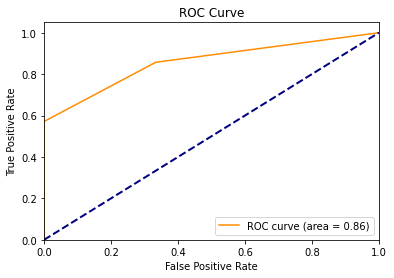

DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 0.9411764705882353


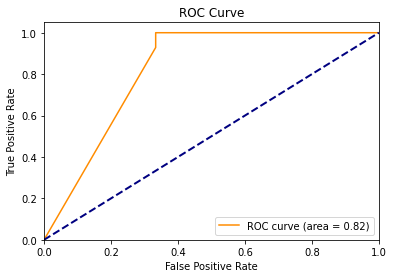


How K can affect the performance of KNN.



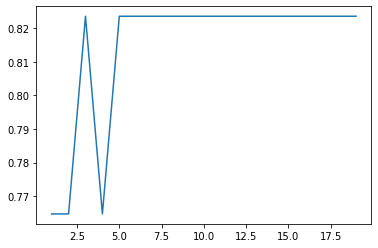

Optimized [K] value is 3, optimized Acc is 0.8235294117647058

How maximum tree depth can affect the performance of DT.



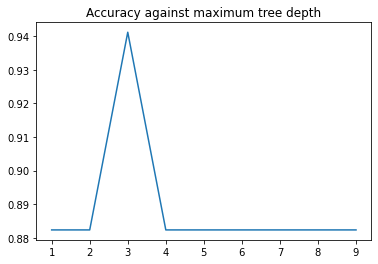

Optimized [maximum tree depth] value is 3, optimized Acc is 0.9411764705882353

How minimum leaf instances can affect the performance of DT.



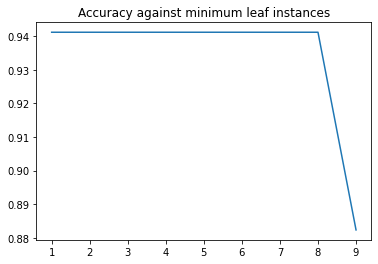

Optimized [minimum leaf instances] value is 1, optimized Acc is 0.9411764705882353

Try out different distance/cost functions for both models.

{'euclidean': 0.8235294117647058, 'manhattan': 0.8823529411764706}
{'entropy': 0.7647058823529411, 'gini': 0.9411764705882353, 'misclassification': 0.9411764705882353}

Get key features [Method 1]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18} 1.0
{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18} 1.0
{0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18} 1.0
{0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18} 1.0
{0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18} 1.0
{0, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18} 1.0
{0, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18} 1.0
{0, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18} 1.0
{0, 8, 9, 10, 11, 12, 15, 16, 17, 18} 1.0
{0, 8, 10, 11, 12, 15, 16, 17, 18} 1.0
{8, 10, 11, 12, 15, 16, 17, 18} 0.9411764705882353
After 10 times search, improve from 1.0 to 1.0
{1, 2, 3, 4, 5, 6, 7, 8, 9, 

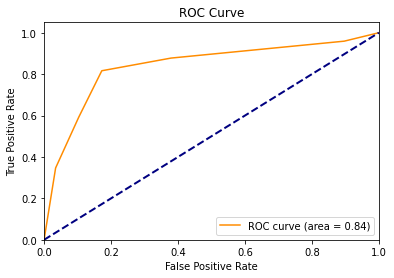

DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 0.717948717948718


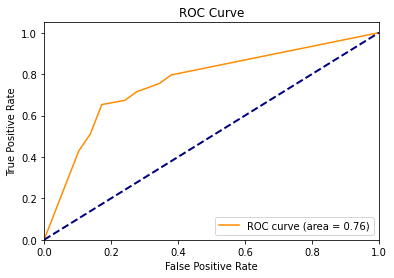


How K can affect the performance of KNN.



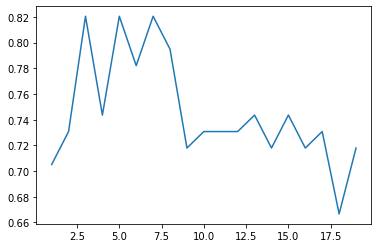

Optimized [K] value is 3, optimized Acc is 0.8205128205128205

How maximum tree depth can affect the performance of DT.



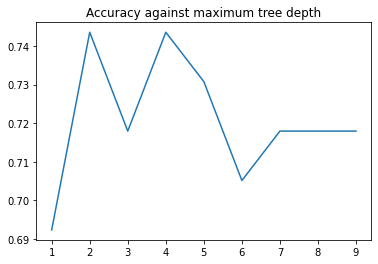

Optimized [maximum tree depth] value is 2, optimized Acc is 0.7435897435897436

How minimum leaf instances can affect the performance of DT.



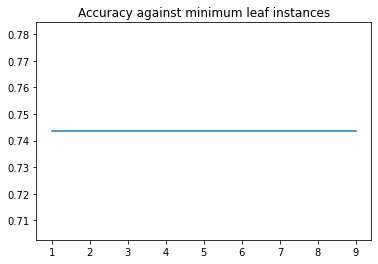

Optimized [minimum leaf instances] value is 1, optimized Acc is 0.7435897435897436

Try out different distance/cost functions for both models.

{'euclidean': 0.8205128205128205, 'manhattan': 0.8205128205128205}
{'entropy': 0.717948717948718, 'gini': 0.7435897435897436, 'misclassification': 0.7307692307692307}

Get key features [Method 1]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} 0.8205128205128205
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} 0.8205128205128205
{2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} 0.8205128205128205
{2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} 0.8205128205128205
{2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17} 0.8205128205128205
{2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 16, 17} 0.8333333333333334
{2, 4, 5, 7, 8, 9, 10, 13, 15, 16, 17} 0.8333333333333334
{2, 4, 5, 7, 8, 9, 10, 13, 16, 17} 0.8333333333333334
{2, 4, 5, 7, 8, 9, 10, 13, 17} 0.8333333333333334
{2, 4, 5, 7, 8, 9, 10, 13} 0.8333333333333334
{2, 4, 5, 8, 9, 10, 13} 0.

In [ ]:
single_fold(hepatitis_np[:, 0].astype(int), hepatitis_np[:, 1:])
single_fold(messidor_np[:, -1].astype(int), messidor_np[:, :-2])

## Part IV : Model improvements and more

### Obtain Key Features
*Reference from: https://machinelearningmastery.com/calculate-feature-importance-with-python/*

Decision Tree key features using DT_regressor

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.08266
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01684
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.16108
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.08736
Feature: 17, Score: 0.52705
Feature: 18, Score: 0.12502


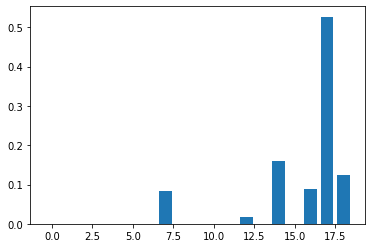

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.14602
Feature: 3, Score: 0.01518
Feature: 4, Score: 0.01708
Feature: 5, Score: 0.00560
Feature: 6, Score: 0.00518
Feature: 7, Score: 0.01521
Feature: 8, Score: 0.14636
Feature: 9, Score: 0.06981
Feature: 10, Score: 0.06687
Feature: 11, Score: 0.06128
Feature: 12, Score: 0.02701
Feature: 13, Score: 0.01743
Feature: 14, Score: 0.25246
Feature: 15, Score: 0.04560
Feature: 16, Score: 0.05098
Feature: 17, Score: 0.05793
Feature: 18, Score: 0.00000


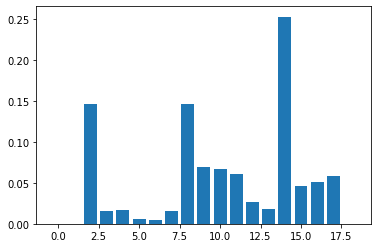

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def DT_regressor(label, features):
    model = DecisionTreeRegressor()
    model.fit(features, label)
    importance = model.feature_importances_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

DT_regressor(hepatitis_np[:, 0].astype(int),hepatitis_np[:, 1:])
DT_regressor(messidor_np[:,-1].astype(int), messidor_np[:,:-1])

#### KNN key features using random forest

Feature: 0, Score: 0.04891
Feature: 1, Score: 0.00674
Feature: 2, Score: 0.01190
Feature: 3, Score: 0.00171
Feature: 4, Score: 0.01559
Feature: 5, Score: 0.01225
Feature: 6, Score: 0.03140
Feature: 7, Score: 0.00523
Feature: 8, Score: 0.00230
Feature: 9, Score: 0.00362
Feature: 10, Score: 0.00491
Feature: 11, Score: 0.07232
Feature: 12, Score: 0.01619
Feature: 13, Score: 0.05474
Feature: 14, Score: 0.11709
Feature: 15, Score: 0.05643
Feature: 16, Score: 0.10764
Feature: 17, Score: 0.38813
Feature: 18, Score: 0.04290


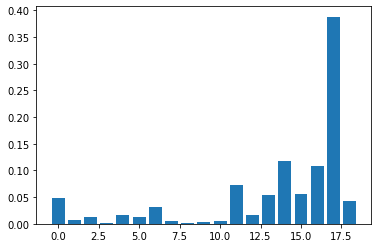

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00300
Feature: 2, Score: 0.14038
Feature: 3, Score: 0.03424
Feature: 4, Score: 0.01645
Feature: 5, Score: 0.02007
Feature: 6, Score: 0.02386
Feature: 7, Score: 0.03541
Feature: 8, Score: 0.08162
Feature: 9, Score: 0.05302
Feature: 10, Score: 0.03823
Feature: 11, Score: 0.07292
Feature: 12, Score: 0.04050
Feature: 13, Score: 0.04383
Feature: 14, Score: 0.19163
Feature: 15, Score: 0.06260
Feature: 16, Score: 0.07408
Feature: 17, Score: 0.06405
Feature: 18, Score: 0.00411


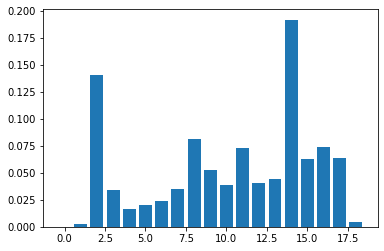

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def random_forest_regressor(label, features):
    model = RandomForestRegressor()
    model.fit(features, label)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

random_forest_regressor(hepatitis_np[:, 0].astype(int),hepatitis_np[:, 1:])
random_forest_regressor(messidor_np[:,-1].astype(int), messidor_np[:,:-1])

### Advanced Data Preprocessing

Use optmizied models and key features from prvious blocks to test several advanced preprocessing techniques.

*   Normalization & Standardization
*   PCA decomponent
*   K Fold

#### Normalization & Standardization

==============================Fold info: 0 out of 4==============================

KNN(K: 5, dist_fn: euclidean)
Acc for Valid: 0.8823529411764706


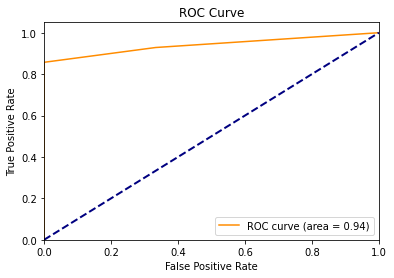

DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 0.9411764705882353


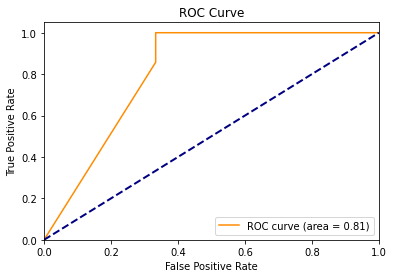


How K can affect the performance of KNN.



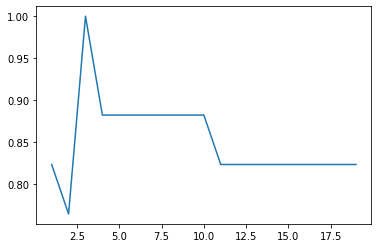

Optimized [K] value is 3, optimized Acc is 1.0

How maximum tree depth can affect the performance of DT.



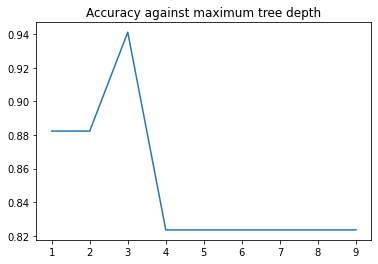

Optimized [maximum tree depth] value is 3, optimized Acc is 0.9411764705882353

How minimum leaf instances can affect the performance of DT.



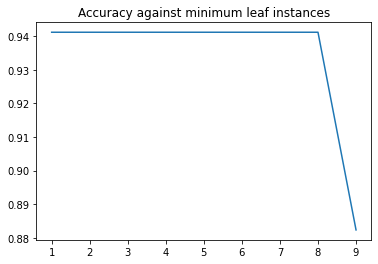

Optimized [minimum leaf instances] value is 1, optimized Acc is 0.9411764705882353

Try out different distance/cost functions for both models.

{'euclidean': 1.0, 'manhattan': 1.0}
{'entropy': 0.7647058823529411, 'gini': 0.9411764705882353, 'misclassification': 0.9411764705882353}

Get key features [Method 1]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 1.0
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 1.0
{2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 1.0
{2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 1.0
{2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 1.0
{2, 3, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18} 1.0
{2, 3, 5, 9, 10, 11, 12, 14, 15, 16, 17, 18} 1.0
{2, 3, 5, 9, 10, 11, 12, 15, 16, 17, 18} 1.0
{2, 3, 5, 10, 11, 12, 15, 16, 17, 18} 1.0
{2, 3, 5, 11, 12, 15, 16, 17, 18} 1.0
{2, 5, 11, 12, 15, 16, 17, 18} 1.0
{2, 11, 12, 15, 16, 17, 18} 1.0
{16, 17, 2, 18, 11, 12} 1.0
{17, 2, 18, 11, 12} 1.0
{2, 18, 11, 12} 0.9411764705882353

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


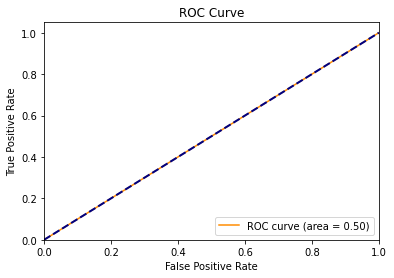

DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 0.717948717948718


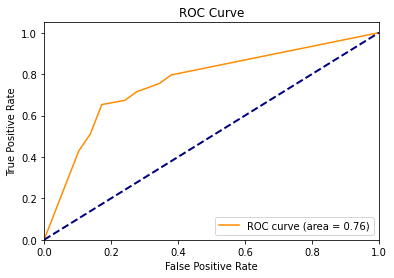


How K can affect the performance of KNN.



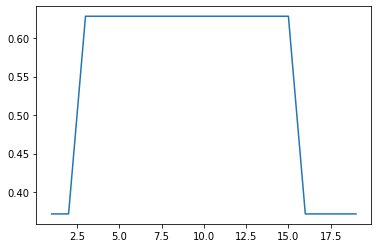

Optimized [K] value is 3, optimized Acc is 0.6282051282051282

How maximum tree depth can affect the performance of DT.



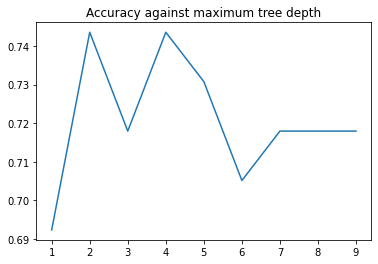

Optimized [maximum tree depth] value is 2, optimized Acc is 0.7435897435897436

How minimum leaf instances can affect the performance of DT.



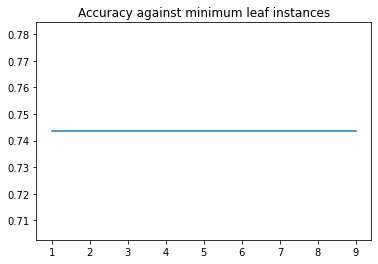

Optimized [minimum leaf instances] value is 1, optimized Acc is 0.7435897435897436

Try out different distance/cost functions for both models.

{'euclidean': 0.6282051282051282, 'manhattan': 0.6282051282051282}
{'entropy': 0.717948717948718, 'gini': 0.7435897435897436, 'misclassification': 0.7307692307692307}

Get key features [Method 1]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} 0.717948717948718
{1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17} 0.7692307692307693
{1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17} 0.782051282051282
{2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17} 0.7692307692307693
After 3 times search, improve from 0.717948717948718 to 0.782051282051282
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17} 0.782051282051282
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17} 0.782051282051282
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17} 0.782051282051282
{2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17} 0.782051282051282
{2,

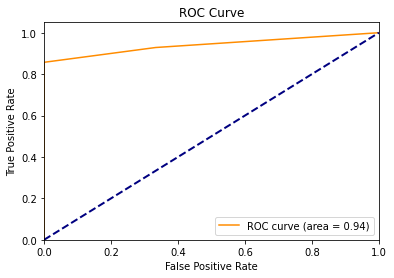

DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 0.9411764705882353


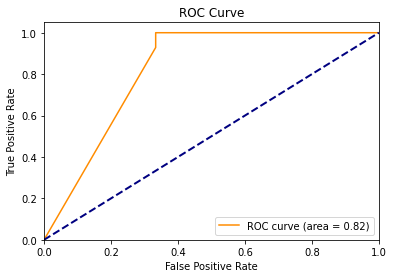


How K can affect the performance of KNN.



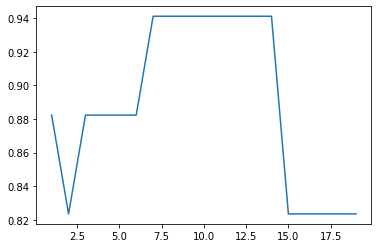

Optimized [K] value is 7, optimized Acc is 0.9411764705882353

How maximum tree depth can affect the performance of DT.



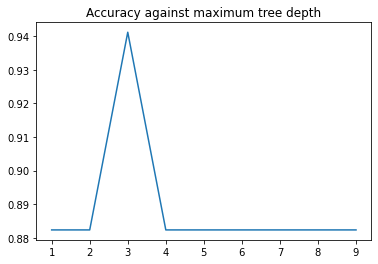

Optimized [maximum tree depth] value is 3, optimized Acc is 0.9411764705882353

How minimum leaf instances can affect the performance of DT.



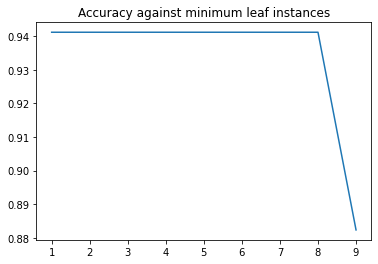

Optimized [minimum leaf instances] value is 1, optimized Acc is 0.9411764705882353

Try out different distance/cost functions for both models.

{'euclidean': 0.9411764705882353, 'manhattan': 0.8823529411764706}
{'entropy': 0.7647058823529411, 'gini': 0.9411764705882353, 'misclassification': 0.9411764705882353}

Get key features [Method 1]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 0.9411764705882353
{1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 1.0
{1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 1.0
{1, 2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 15, 16, 17, 18} 1.0
{1, 2, 3, 4, 5, 6, 9, 10, 11, 14, 15, 16, 17, 18} 1.0
{2, 3, 4, 5, 6, 9, 10, 11, 14, 15, 16, 17, 18} 1.0
{2, 4, 5, 6, 9, 10, 11, 14, 15, 16, 17, 18} 1.0
{2, 4, 5, 6, 9, 10, 14, 15, 16, 17, 18} 1.0
{4, 5, 6, 9, 10, 14, 15, 16, 17, 18} 1.0
{4, 5, 6, 9, 10, 14, 16, 17, 18} 1.0
{4, 6, 9, 10, 14, 16, 17, 18} 0.8823529411764706
After 10 times search, improve from 0.9411764705882353 to 1.0
{1, 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


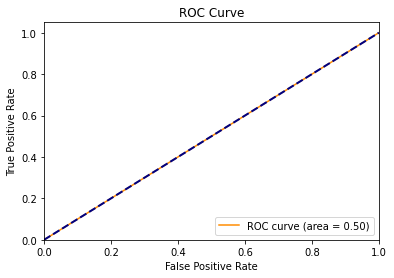

DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 0.717948717948718


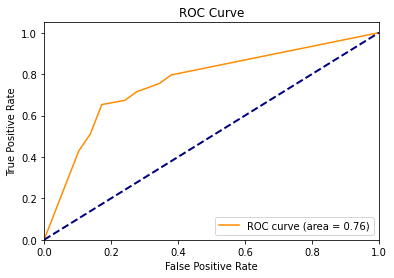


How K can affect the performance of KNN.



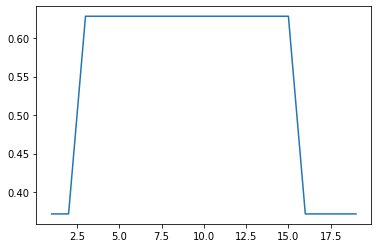

Optimized [K] value is 3, optimized Acc is 0.6282051282051282

How maximum tree depth can affect the performance of DT.



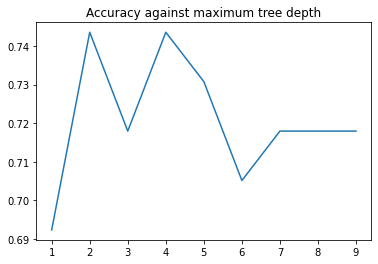

Optimized [maximum tree depth] value is 2, optimized Acc is 0.7435897435897436

How minimum leaf instances can affect the performance of DT.



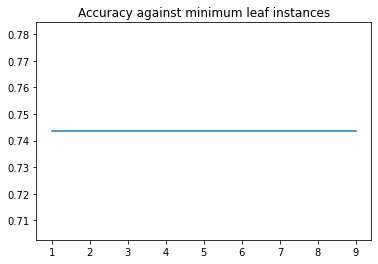

Optimized [minimum leaf instances] value is 1, optimized Acc is 0.7435897435897436

Try out different distance/cost functions for both models.

{'euclidean': 0.6282051282051282, 'manhattan': 0.6282051282051282}
{'entropy': 0.717948717948718, 'gini': 0.7435897435897436, 'misclassification': 0.7307692307692307}

Get key features [Method 1]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} 0.7051282051282052
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17} 0.7435897435897436
{1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17} 0.7564102564102564
{1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17} 0.7564102564102564
{1, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17} 0.7564102564102564
{1, 3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17} 0.7692307692307693
{3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17} 0.7564102564102564
After 6 times search, improve from 0.7051282051282052 to 0.7692307692307693
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17} 0.782051282051282
{1, 2, 3, 4, 5, 6, 7, 8, 9, 

In [ ]:
# Normalization
single_fold(hepatitis_np[:, 0].astype(int), hepatitis_np[:, 1:], feature_fn = lambda x: (x - x.min(0)) / x.ptp(0))
single_fold(messidor_np[:, -1].astype(int), messidor_np[:, :-2], feature_fn = lambda x: (x - x.min(0)) / x.ptp(0))

# Standardization
single_fold(hepatitis_np[:, 0].astype(int), hepatitis_np[:, 1:], feature_fn = lambda x: (x - x.mean(0)) / x.std(0))
single_fold(messidor_np[:, -1].astype(int), messidor_np[:, :-2], feature_fn = lambda x: (x - x.mean(0)) / x.std(0))

#### K fold

    In our setup: 
        5 Fold: three for training, one for validation, one for testing

hepatitis dataset
Fold 0 Acc: 0.8333333333333334
Fold 1 Acc: 0.8333333333333334
Fold 2 Acc: 0.8333333333333334
Fold 3 Acc: 0.8333333333333334
Merged All Folds Acc: 0.8333333333333334


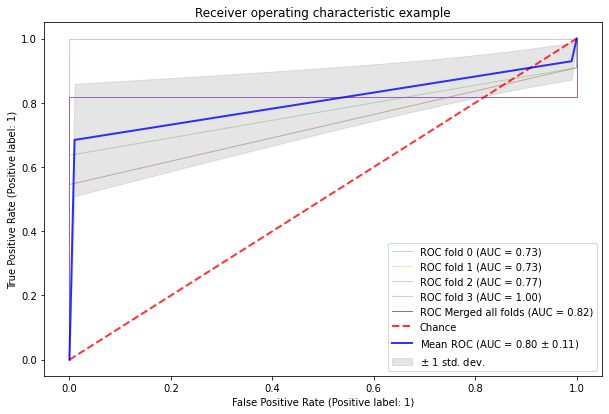

Fold 0 Acc: 0.8333333333333334
Fold 1 Acc: 0.8333333333333334
Fold 2 Acc: 0.8333333333333334
Fold 3 Acc: 0.9166666666666666
Merged All Folds Acc: 0.75


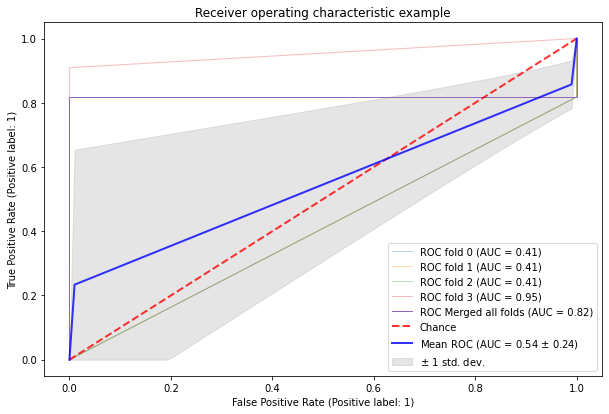


messidor dataset
Fold 0 Acc: 0.7777777777777778
Fold 1 Acc: 0.7916666666666666
Fold 2 Acc: 0.8194444444444444
Fold 3 Acc: 0.7222222222222222
Merged All Folds Acc: 0.8472222222222222


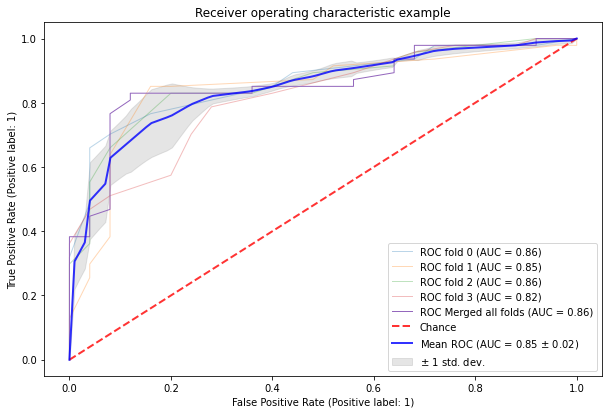

Fold 0 Acc: 0.7083333333333334
Fold 1 Acc: 0.5694444444444444
Fold 2 Acc: 0.7638888888888888
Fold 3 Acc: 0.625
Merged All Folds Acc: 0.7361111111111112


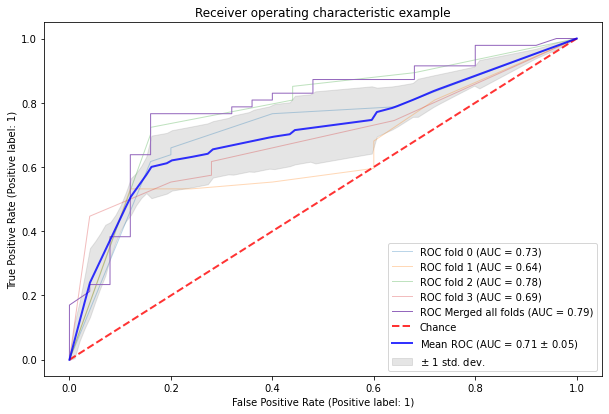

In [ ]:
from sklearn.metrics import RocCurveDisplay
from functools import partial

def run_k_fold(model, label, features, num_folds = 4, feature_fn=lambda x: x):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(10, 6.5))

    features = feature_fn(features)
    for fold in range(num_folds):
        # print("="*30 + f'Fold info: {fold} out of {num_folds}' + "="*30 + '\n')

        train_index, valid_index, test_index = split_dataset_kfold(label, num_folds, fold)
        tx, ty, vx, vy = features[train_index], label[train_index], features[valid_index], label[valid_index]
        test_x, test_y = features[test_index], label[test_index]
        output = test(model(), tx, ty, test_x, test_y)
        print(f"Fold {fold} Acc: {(np.argmax(output, axis=-1) == test_y).mean()}")
        raw_output = output if fold == 0 else raw_output + output
        output = output[:,1]
        folds_output = output if fold == 0 else folds_output + output
        viz = RocCurveDisplay.from_predictions(
            test_y,
            output,
            name="ROC fold {}".format(fold),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    # merge 5 fold
    output = folds_output / num_folds
    print(f"Merged All Folds Acc: {(np.argmax(raw_output, axis=-1) == test_y).mean()}")
    viz = RocCurveDisplay.from_predictions(
        test_y,
        output,
        name="ROC Merged all folds",
        alpha=1,
        lw=1,
        ax=ax,
    )

    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    # end

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs[:-1], axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs[:-1])
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example",
    )
    ax.legend(loc="lower right")
    plt.show()

print("hepatitis dataset")
run_k_fold(partial(KNN, K=3, dist_fn="euclidean"), hepatitis_np[:, 0].astype(int), hepatitis_np[:, 1:])
run_k_fold(partial(DecisionTree, max_depth=3, cost_fn="gini"), hepatitis_np[:, 0].astype(int), hepatitis_np[:, 1:])

print("\nmessidor dataset")
run_k_fold(partial(KNN, K=18, dist_fn="euclidean"), messidor_np[:, -1].astype(int), messidor_np[:, :-2])
run_k_fold(partial(DecisionTree, max_depth=7, cost_fn="entropy"), messidor_np[:, -1].astype(int), messidor_np[:, :-2])


#### PCA decomponent

    In our setup: 
        For easy visulization, we choose decomponent into 2 components.

In [ ]:
from sklearn.decomposition import PCA
from functools import partial

def run_k_fold_without_ploting(model, label, features, num_folds = 4, feature_fn=lambda x: x):
    features = feature_fn(features)
    for fold in range(num_folds):
        train_index, valid_index, test_index = split_dataset_kfold(label, num_folds, fold)
        tx, ty, vx, vy = features[train_index], label[train_index], features[valid_index], label[valid_index]
        test_x, test_y = features[test_index], label[test_index]
        output = evaluate(model(), tx, ty, test_x, test_y)[:,1]
        folds_output = output if fold == 0 else folds_output + output

    # merge 5 fold
    output = folds_output / num_folds
    return output

print("hepatitis dataset")
run_k_fold_without_ploting(partial(KNN, K=3, dist_fn="euclidean"), hepatitis_np[:, 0].astype(int), PCA(10).fit_transform(hepatitis_np[:, 1:]))
run_k_fold_without_ploting(partial(DecisionTree, max_depth=3, cost_fn="gini"), hepatitis_np[:, 0].astype(int), PCA(10).fit_transform(hepatitis_np[:, 1:]))

print("\nmessidor dataset")
run_k_fold_without_ploting(partial(KNN, K=18, dist_fn="euclidean"), messidor_np[:, -1].astype(int), PCA(10).fit_transform(messidor_np[:, :-2]))
run_k_fold_without_ploting(partial(DecisionTree, max_depth=7, cost_fn="entropy"), messidor_np[:, -1].astype(int), PCA(10).fit_transform(messidor_np[:, :-2]))

''

hepatitis dataset
KNN(K: 3, dist_fn: euclidean)
Acc for Valid: 0.8333333333333334
KNN(K: 3, dist_fn: euclidean)
Acc for Valid: 0.8333333333333334
KNN(K: 3, dist_fn: euclidean)
Acc for Valid: 0.8333333333333334
KNN(K: 3, dist_fn: euclidean)
Acc for Valid: 0.8333333333333334
DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 0.9166666666666666
DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 1.0
DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 1.0
DecisionTree(num_classes=2, max_depth=3, cost_fn=gini, min_leaf_instances=1)
Acc for Valid: 0.9166666666666666

messidor dataset
KNN(K: 18, dist_fn: euclidean)
Acc for Valid: 0.7777777777777778
KNN(K: 18, dist_fn: euclidean)
Acc for Valid: 0.7916666666666666
KNN(K: 18, dist_fn: euclidean)
Acc for Valid: 0.8194444444444444
KNN(K: 18, dist_fn: euclidean)
Acc for Valid: 0.7222222222222222
DecisionTree(num_classes=2, max_de

''

### Decision Boundary

hepatitis dataset
With PCA Data


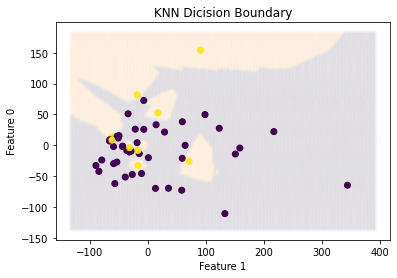

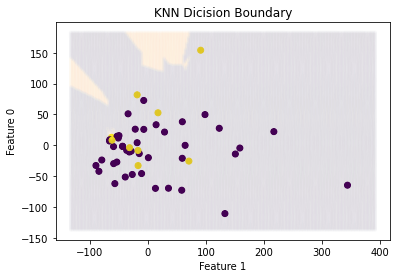

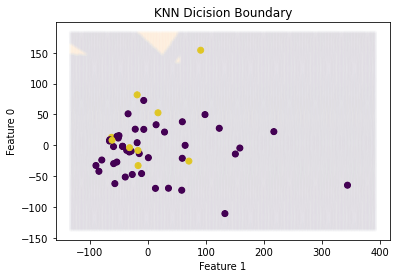

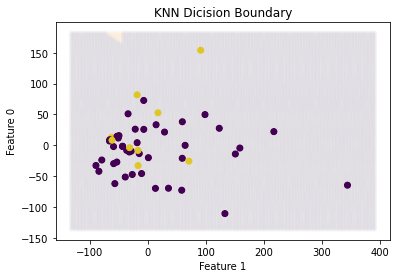

With selected key features


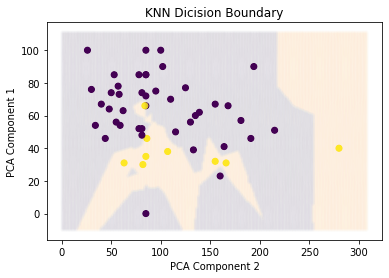

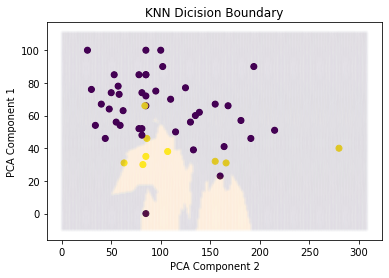

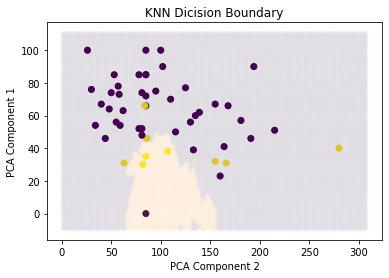

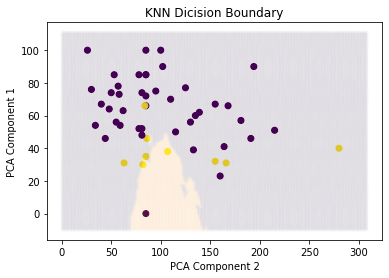


messidor dataset
PCA Transform


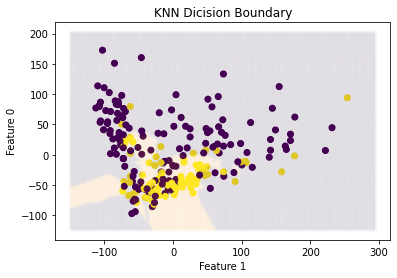

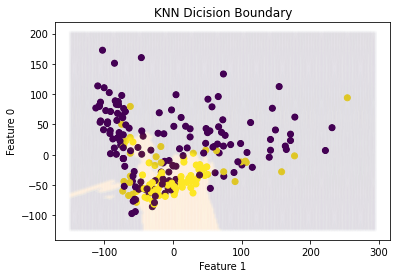

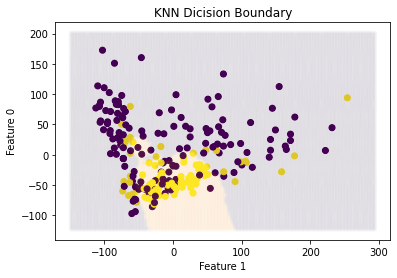

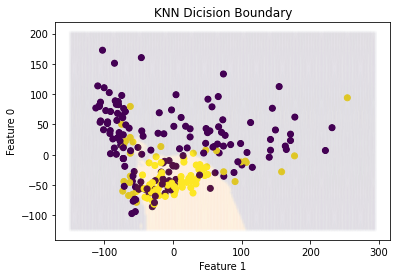

With selected key features


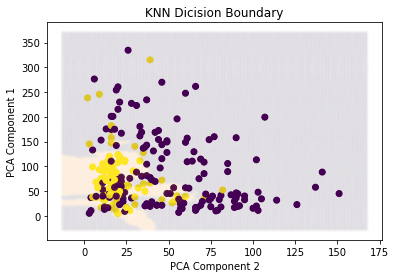

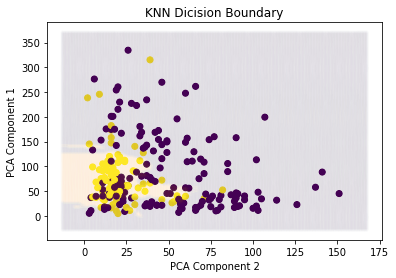

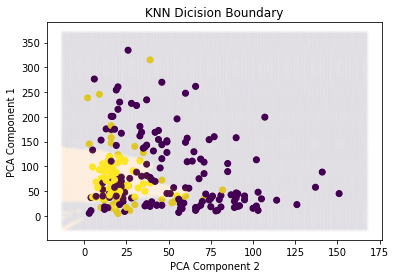

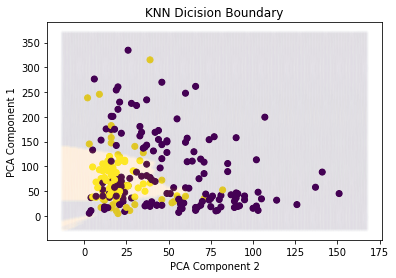

In [ ]:
def plot_decision_boundary(model, label, features, num_folds = 4, feature_fn=lambda x: x, feature=[]):
    # features = feature_fn(features)
    if not feature: # PCA
        feature = [0, 1]
        pca=True
    else:
        pca=False

    for fold in range(num_folds):
        train_index, valid_index, test_index = split_dataset_kfold(label, num_folds, fold)
        tx, ty, vx, vy = features[train_index][:, feature], label[train_index], features[valid_index][:, feature], label[valid_index]
        test_x, test_y = features[test_index][:, feature], label[test_index]

        a, b = np.min(tx[:,0]), np.max(tx[:,0])
        a = a - (b-a) * 0.1 # add margin
        b = b + (b-a) * 0.1 # add margin
        x0v = np.linspace(a, b, 200)

        a, b = np.min(tx[:,1]), np.max(tx[:,1])
        a = a - (b-a) * 0.1 # add margin
        b = b + (b-a) * 0.1 # add margin
        x1v = np.linspace(a, b, 200)
        x0, x1 = np.meshgrid(x0v, x1v)
        x_all = np.vstack((x0.ravel(),x1.ravel())).T

        y_train_prob = np.zeros((tx.shape[0], 2))
        y_train_prob[np.arange(ty.shape[0]), ty] = 1

        output = model().fit(tx, ty).predict(x_all)
        y_prob_all = output if fold == 0 else y_prob_all + output

    # merge 5 fold
    y_prob_all = y_prob_all / num_folds
    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
    plt.scatter(tx[:,0], tx[:,1], c=y_train_prob[:,0], marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all[:,0], marker='.', alpha=.01)
    # feature
    plt.title(f"{model.func.__name__} Dicision Boundary")
    if pca:
        plt.ylabel(f'Feature {feature[0]}')
        plt.xlabel(f'Feature {feature[1]}')
    else:
        plt.ylabel('PCA Component 1')
        plt.xlabel('PCA Component 2')

    plt.show()


def make_all_input(feature, num_points=200):
    assert feature.shape[-1] == 2
    x0v = np.linspace(np.min(feature[:,0]), np.max(feature[:,0]), num_points)
    x1v = np.linspace(np.min(feature[:,1]), np.max(feature[:,1]), num_points)
    x0,x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T
    return x_all
    

print("hepatitis dataset")
print("With PCA Data")
for k in [1,3,5,7]:
    plot_decision_boundary(partial(KNN, K=k, dist_fn="euclidean"), hepatitis_np[:, 0].astype(int), PCA(2).fit_transform(hepatitis_np[:, 1:]))

print("With selected key features")
for k in [1,3,5,7]:
    plot_decision_boundary(partial(KNN, K=k, dist_fn="euclidean"), hepatitis_np[:, 0].astype(int), hepatitis_np[:, 1:], feature = [14, 17])
    

print("\nmessidor dataset")
print("PCA Transform")
for k in [6, 12, 18, 24]:
    plot_decision_boundary(partial(KNN, K=k, dist_fn="euclidean"), messidor_np[:, -1].astype(int), PCA(2).fit_transform(messidor_np[:, :-2]))
print("With selected key features")
for k in [6, 12, 18, 24]:
    plot_decision_boundary(partial(KNN, K=k, dist_fn="euclidean"), messidor_np[:, -1].astype(int), messidor_np[:, :-2], feature = [2, 8])


hepatitis dataset
PCA Transform


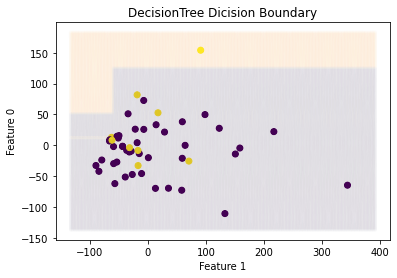

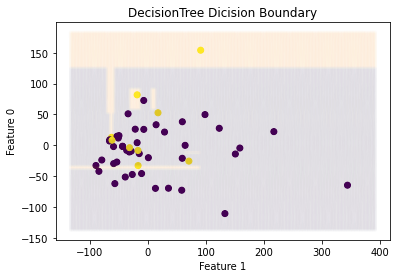

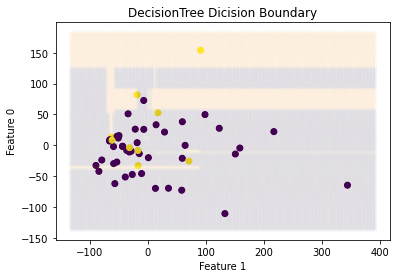

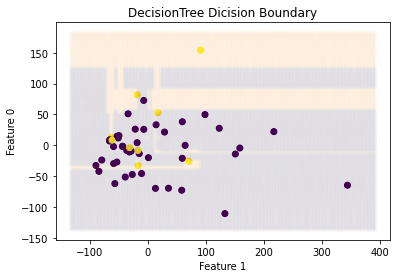


With selected key features


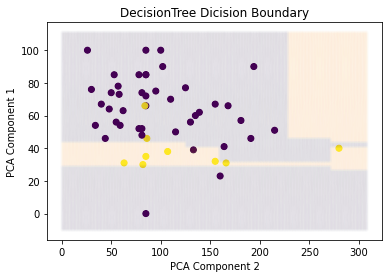

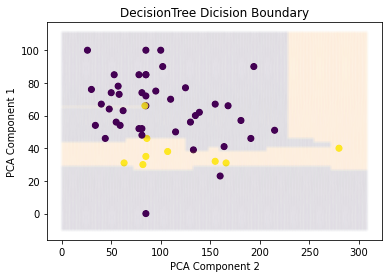

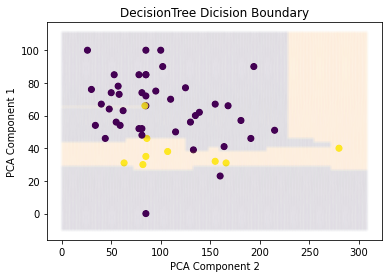

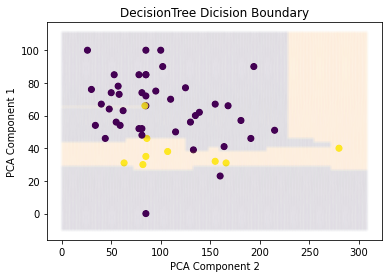


messidor dataset
PCA Transform


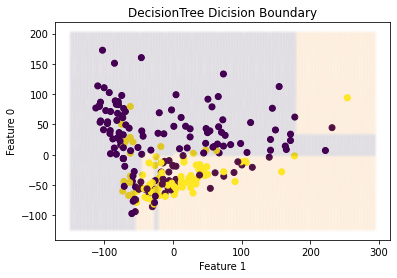

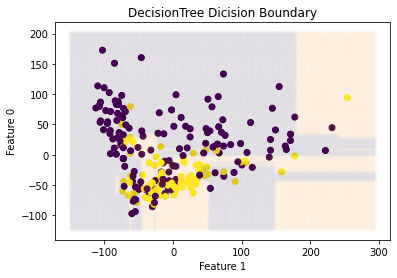

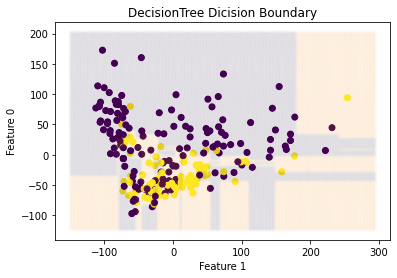

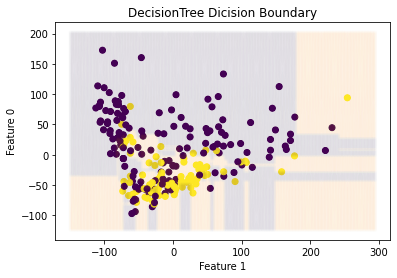

With selected key features


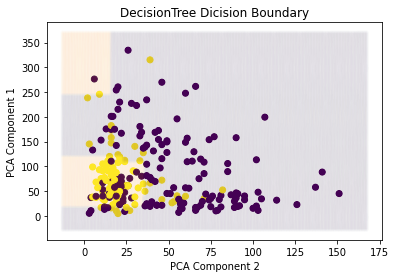

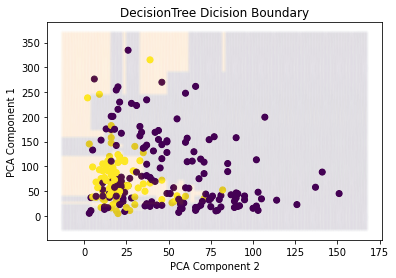

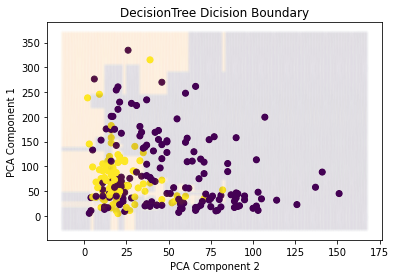

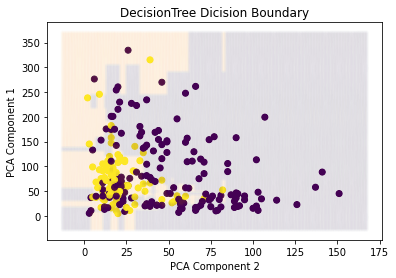

In [ ]:
print("hepatitis dataset")
print("PCA Transform")
for max_depth in [3,5,7,9]:
    plot_decision_boundary(partial(DecisionTree, max_depth=max_depth, cost_fn="gini"), hepatitis_np[:, 0].astype(int), PCA(2).fit_transform(hepatitis_np[:, 1:]))
print("\nWith selected key features")
for max_depth in [3,5,7,9]:
    plot_decision_boundary(partial(DecisionTree, max_depth=max_depth, cost_fn="gini"), hepatitis_np[:, 0].astype(int), hepatitis_np[:, 1:], feature = [14, 17])


print("\nmessidor dataset")
print("PCA Transform")
for max_depth in [3,5,7,9]:
    plot_decision_boundary(partial(DecisionTree, max_depth=max_depth, cost_fn="entropy"), messidor_np[:, -1].astype(int), PCA(2).fit_transform(messidor_np[:, :-2]))
print("With selected key features")
for max_depth in [3,5,7,9]:
    plot_decision_boundary(partial(DecisionTree, max_depth=max_depth, cost_fn="entropy"), messidor_np[:, -1].astype(int), messidor_np[:, :-2], feature = [2, 8])